Name : Gunja Om Prakash
Student ID : 2131025

## CSC 580 AI II (Winter 2025) 
## **Homework\#1-2**: K-armed Bandit
### This code implements the example on Slide 16 in lecture note (\#1 MDP)

### (1) Definition of the four bandits (Action1-4), implemented as a function -- Completely filled

In [4]:
import random
import numpy as np

def Action1():
    return 8

def Action2():
    num = random.random()
    if num < 0.88:
        return 0
    else:
        return 100

def Action3():
    return random.uniform(-10, 35)

def Action4():
    num = random.random()
    ret = 0.0
    if num < 0.3333:
        ret = 20
    elif num < 0.6667:
        ret = random.choice([8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
    return ret

### (2) Code for the simulation of Exploration vs. Exploitation

In [92]:
np.random.seed(42)
random.seed(42)

import numpy as np       
def run_epsilon_greedy(actions, epsilon, timesteps, runs, initial_Q=False, init_Qlist=None):
    """
    This function essentially implements the 'Simple bandit algorithm' shown in
    Sutton's book, p. 32.  For EVERY timestep, the _greedy_ action is determined
    by looking up the Q values (of the actions) or chosen randomly depending
    on the epsilon value.  Repeat the experiment 'runs' numberof times.
    """
    total_rewards = np.zeros((runs, timesteps))
    total_optimal_actions_taken = np.zeros(timesteps)
    total_N = np.zeros(len(actions))  # Track total action counts

    for run in range(runs): 
        N = [0] * len(actions)
        if initial_Q and init_Qlist:
            Q = init_Qlist[:]
        else:
            Q = [0] * len(actions)
        for t in range(timesteps):
            if np.random.rand() < 1 - epsilon:  # Exploitation
                max_index = np.argmax(Q)
                if Q.count(Q[max_index]) > 1:
                    action_index = np.random.choice([i for i in range(len(actions)) if Q[i] == Q[max_index]])
                else:
                    action_index = max_index
            else:  # Exploration
                action_index = np.random.randint(0, len(actions))
                
            if(action_index == 2):
                total_optimal_actions_taken[t] += 1
                
            
            reward = actions[action_index]()
            N[action_index] =  N[action_index]+ 1
            Q[action_index] = Q[action_index] + (reward - Q[action_index]) / N[action_index]
            total_rewards[run, t] = reward  
            
        total_N += N
            
    return np.array(Q), total_N/runs, total_rewards.mean(axis=0),total_optimal_actions_taken
    


In [93]:
Actions = [Action1, Action2, Action3, Action4]  # 4 bandits/actions (defined in the first cell)
timesteps = 1000  # number of timesteps per run
runs = 2000       # number of runs

epsilons = [0.0, 0.01, 0.1]
totalRewardsC = []
totalOptimalActionsTaken = {}
for epsilon in epsilons:
    Q,N,totalRewards,totalActionsTaken = run_epsilon_greedy(Actions, epsilon, timesteps, runs)
    totalRewardsC.append(totalRewards)
    totalOptimalActionsTaken[epsilon] = totalActionsTaken
    print(f"Epsilon {epsilon}: Q={Q}, N={N}")


Epsilon 0.0: Q=[ 0.          0.         12.40392178  0.        ], N=[429.734   58.294  251.0225 260.9495]
Epsilon 0.01: Q=[ 8.         10.71428571  9.33976541 10.92650104], N=[195.6405  82.367  396.3965 325.596 ]
Epsilon 0.1: Q=[ 8.         10.         12.90232262 10.0776699 ], N=[ 52.7735 168.704  534.7975 243.725 ]


### (3) Run the algorithm with various epsilons

We can observe the Q values and the number of times each action was called (over 2000 runs) for various epsilon values.  Note the _optimal_ action (as the ground truth) is Action3.

### (4) Plot the performance of the three epsilons.  Your plot should look like this:
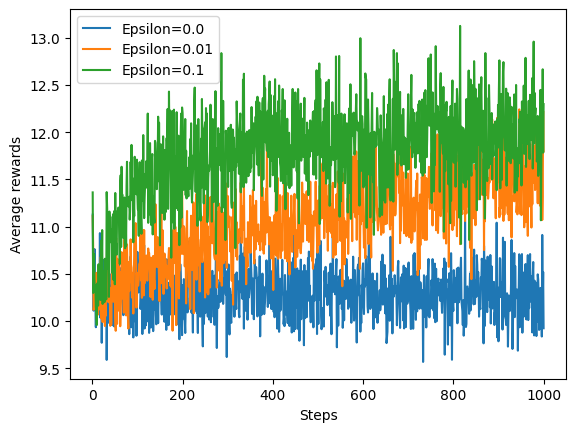

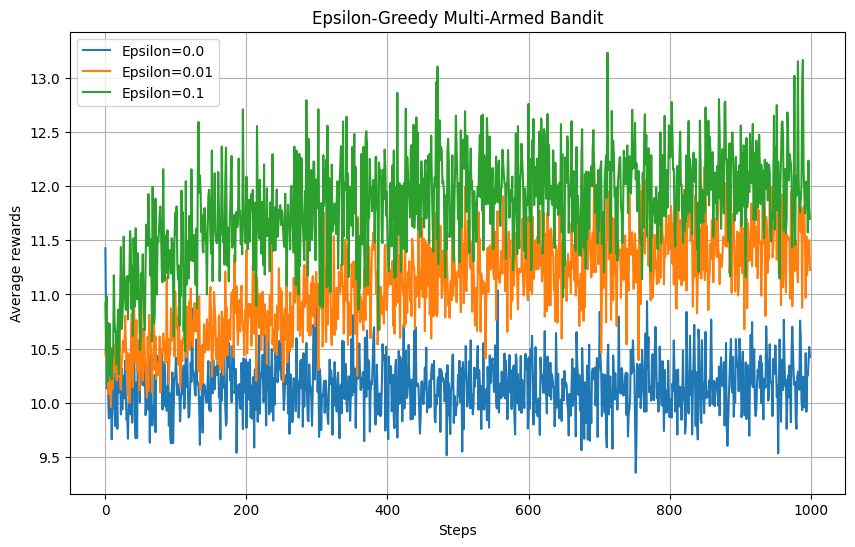

In [94]:
##
## Write your code
##
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for epsilon,totalRewardsC in zip(epsilons,totalRewardsC):
    plt.plot(range(timesteps), totalRewardsC, label=f"Epsilon={epsilon}")

plt.xlabel("Steps")
plt.ylabel("Average rewards")
plt.title("Epsilon-Greedy Multi-Armed Bandit")
plt.legend()
plt.grid()
plt.show()

### (5) Plot the percentage of the time the Optimal Action (Action 3) was called.  Your plot should look like this:
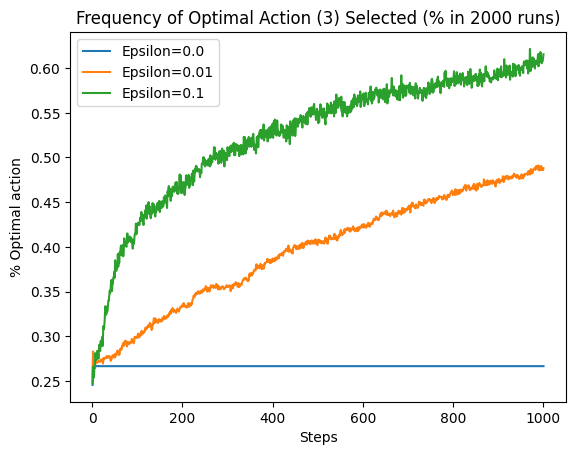

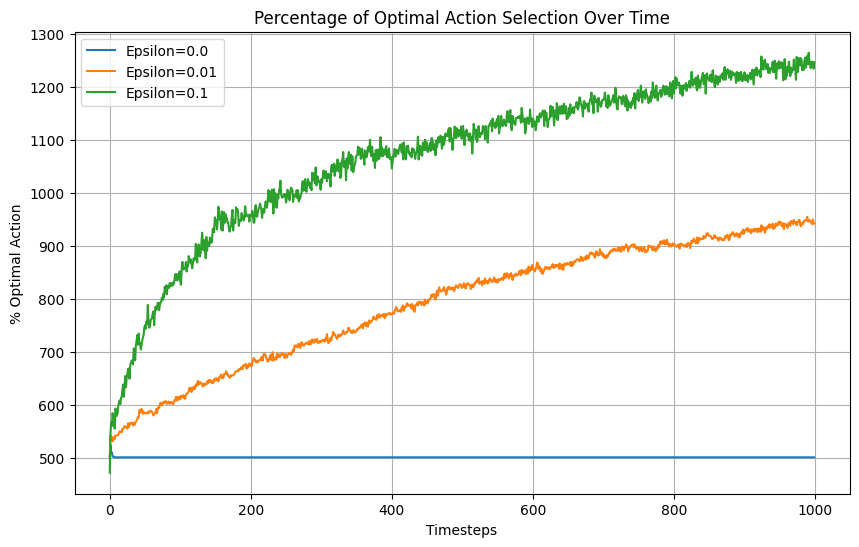

In [95]:
plt.figure(figsize=(10, 6))
for epsilon,freq in totalOptimalActionsTaken.items():
    plt.plot(freq, label=f"Epsilon={epsilon}")

plt.xlabel("Timesteps")
plt.ylabel("% Optimal Action")
plt.title("Percentage of Optimal Action Selection Over Time")
plt.legend()
plt.grid()
plt.show()

### (6) Experiment with Initial Q values.
**Make Action1 the best initially (by setting its Q value the highest)**.  Then run the same experiment and show the average rewards.

Show the output.  It should look similar to this:

```
Epsilon 0.0: Q=[8. 0. 0. 0.], N=[1000.    0.    0.    0.]
Epsilon 0.01: Q=[8.     1.6905 4.5245 5.0895], N=[966.3555   8.2365  13.403   12.005 ]
Epsilon 0.1: Q=[8.     1.051  1.906  1.1695], N=[882.19    40.284   40.3105  37.2155]
```



In [96]:
Actions = [Action1, Action2, Action3, Action4]  # 4 bandits/actions (defined in the first cell)
timesteps = 1000  # number of timesteps per run
runs = 2000       # number of runs

epsilons = [0.0, 0.01, 0.1]
totalRewardsC = []
totalOptimalActionsTaken = {}
for epsilon in epsilons:
    Q,N,totalRewards,totalActionsTaken = run_epsilon_greedy(Actions, epsilon, timesteps, runs, initial_Q=True, init_Qlist=[10, 0, 0, 0])
    totalRewardsC.append(totalRewards)
    totalOptimalActionsTaken[epsilon] = totalActionsTaken
    print(f"Epsilon {epsilon}: Q={Q}, N={N}")

Epsilon 0.0: Q=[8. 0. 0. 0.], N=[1000.    0.    0.    0.]
Epsilon 0.01: Q=[ 8.         0.        12.3682912 10.2      ], N=[436.818   64.4155 274.7955 223.971 ]
Epsilon 0.1: Q=[ 8.          4.76190476 12.63842715 10.39534884], N=[ 81.3015 181.322  489.885  247.4915]


### (7) Plot the performance of the three epsilons.  Your plot should look like this:
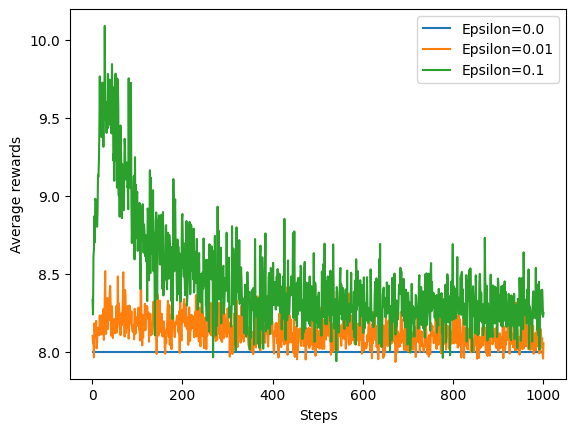

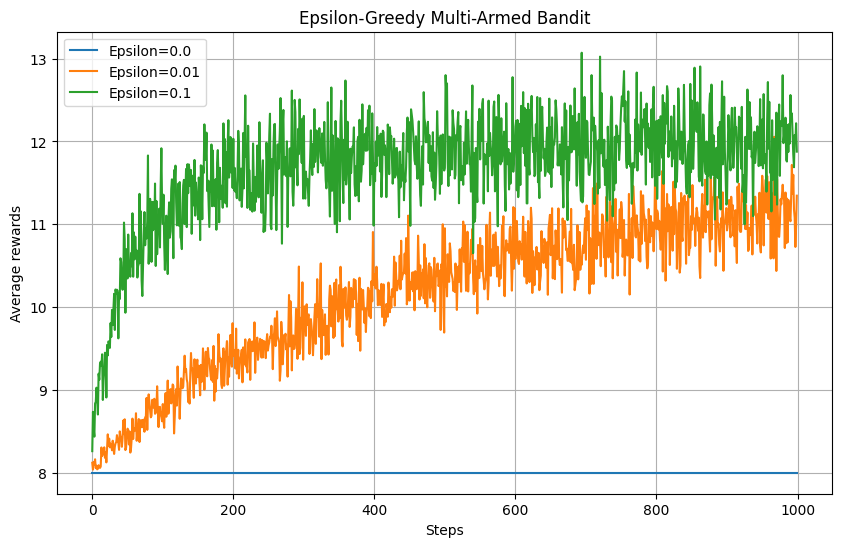

In [97]:
## Write your code
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for epsilon,totalRewardsC in zip(epsilons,totalRewardsC):
    plt.plot(range(timesteps), totalRewardsC, label=f"Epsilon={epsilon}")

plt.xlabel("Steps")
plt.ylabel("Average rewards")
plt.title("Epsilon-Greedy Multi-Armed Bandit")
plt.legend()
plt.grid()
plt.show()